<h1 style="font-size:32px; color:Black;">Step 2: Exploratory Data Analysis and Feature Selection</h1>


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


Target Variable Analysis

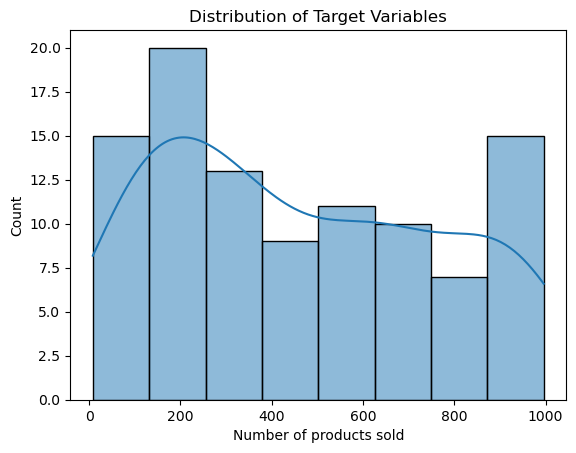

In [10]:
sns.histplot(df_encoded['Number of products sold'], kde=True)
plt.title("Distribution of Target Variables")
plt.show()

Correlation Heatmap

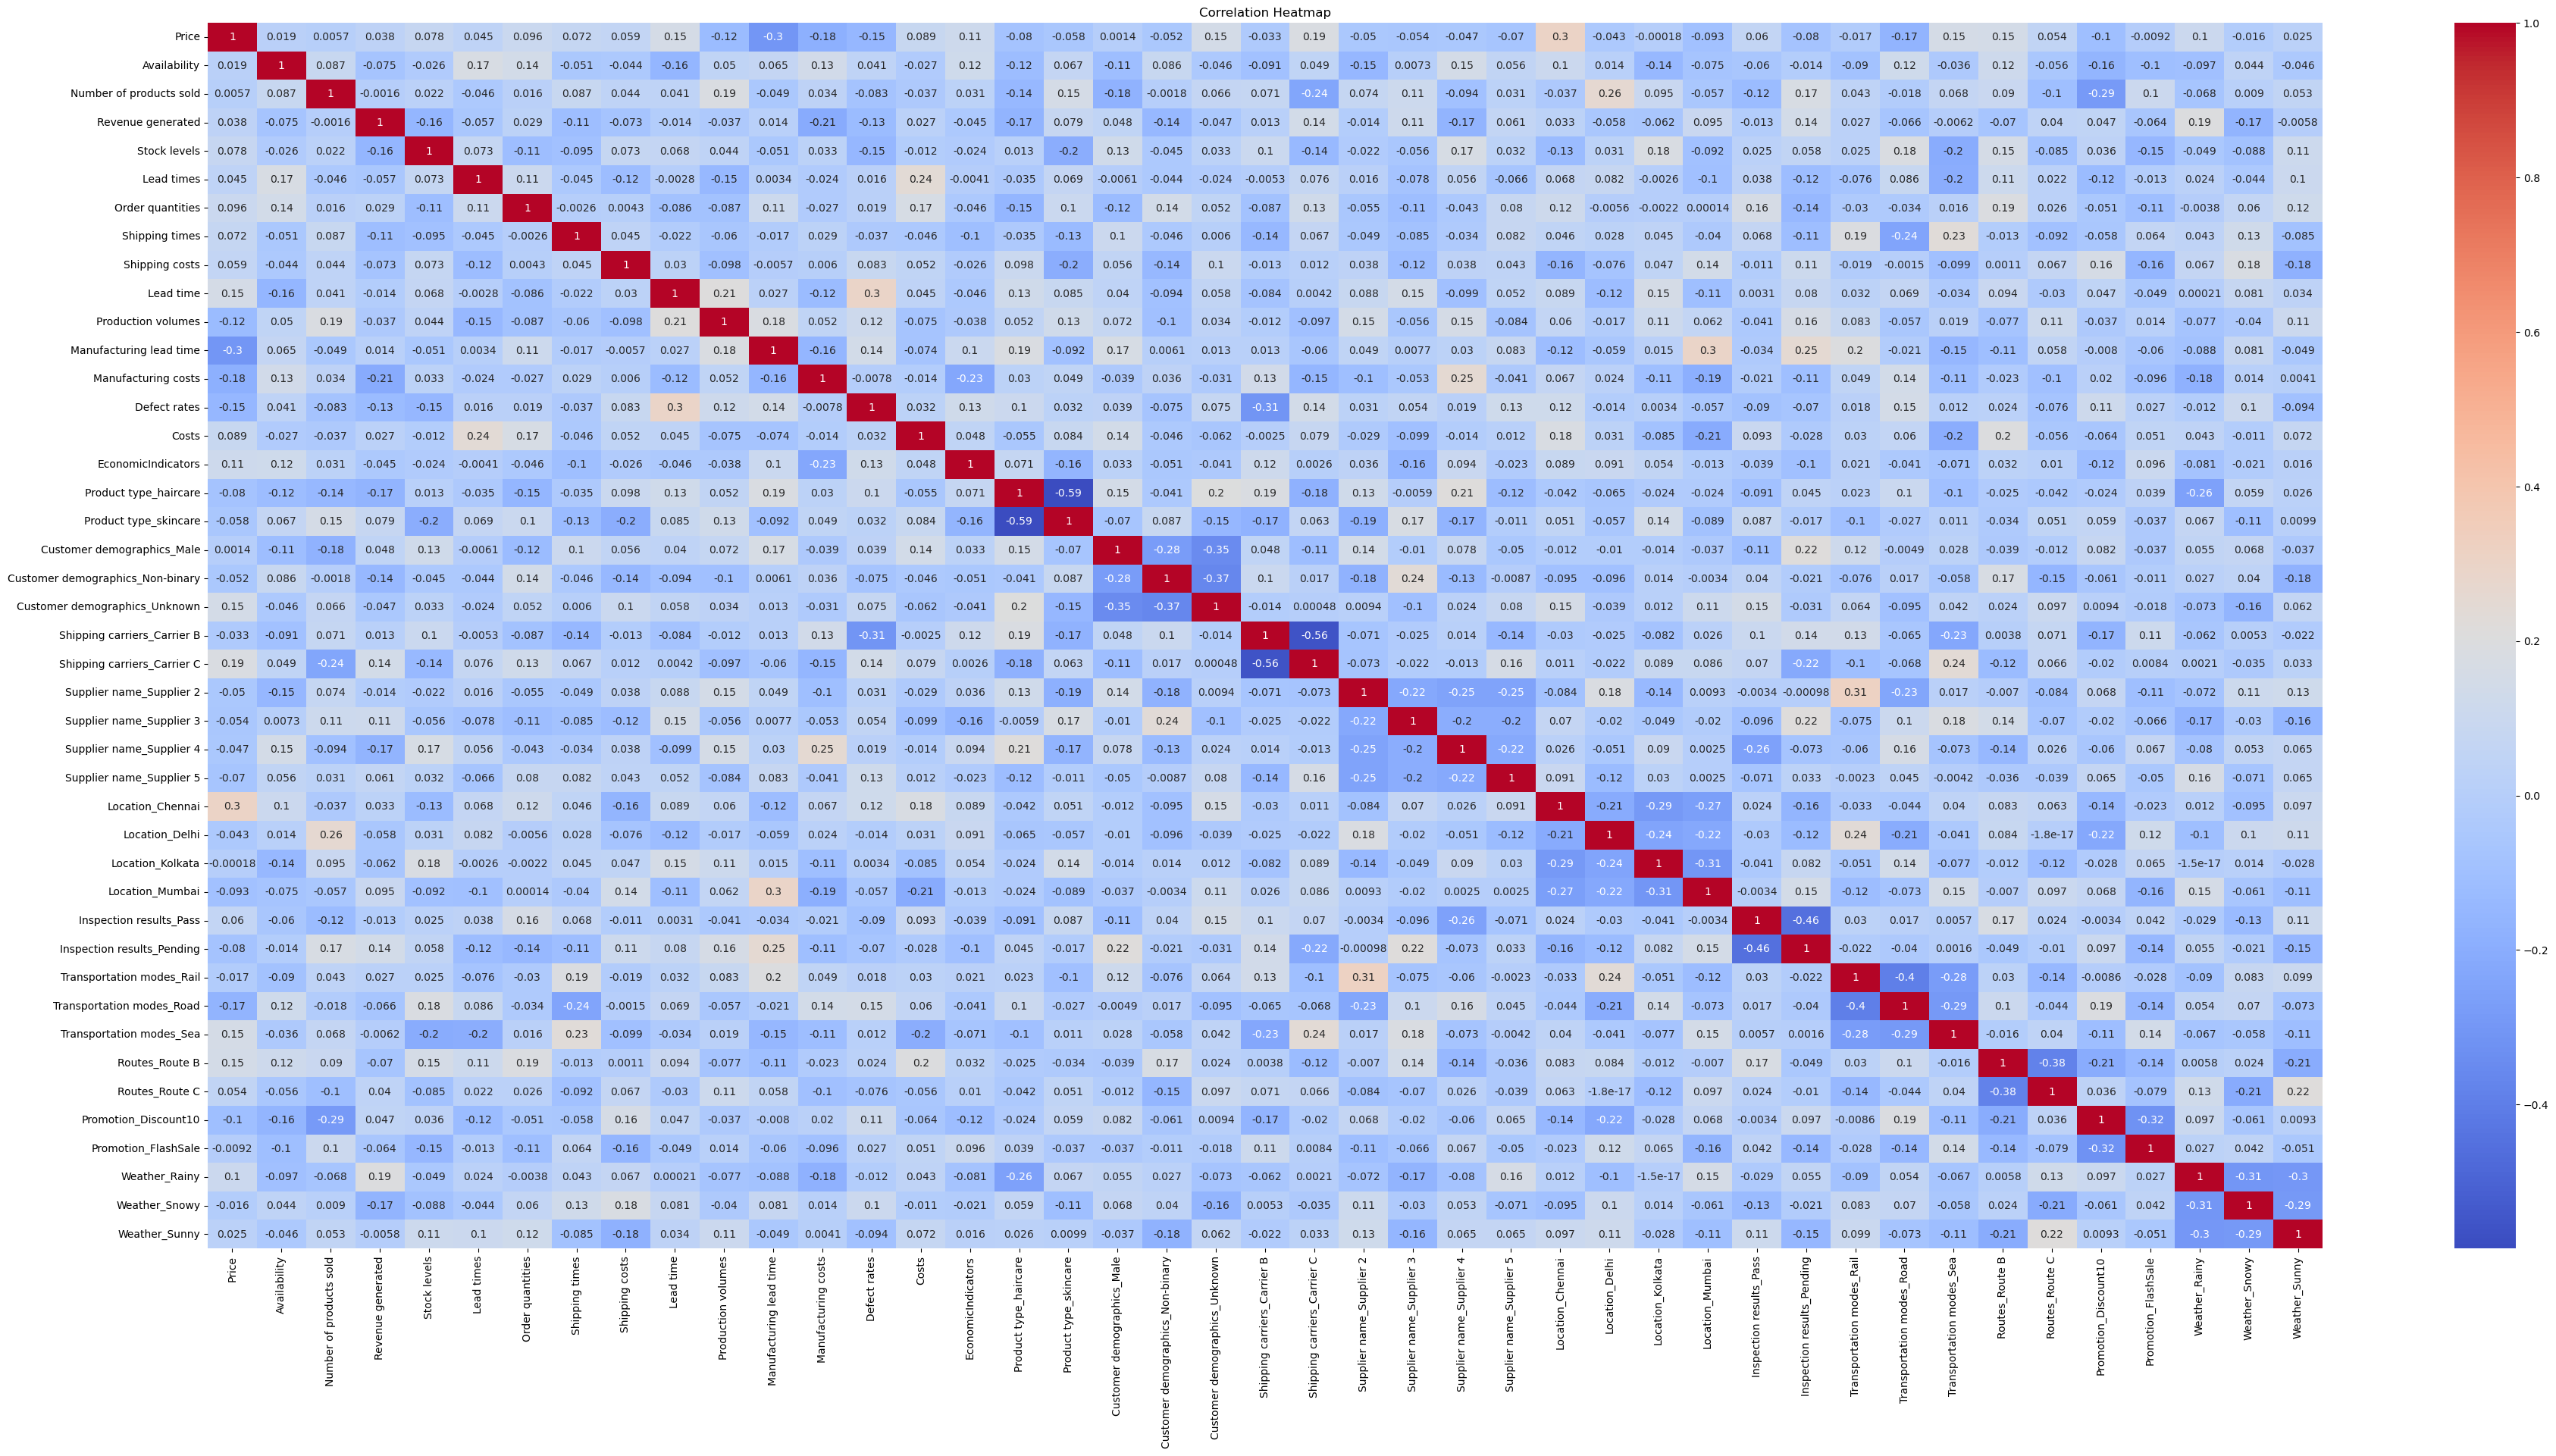

In [11]:
plt.figure(figsize=(45,21))
sns.heatmap(df_encoded.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Select Important Features

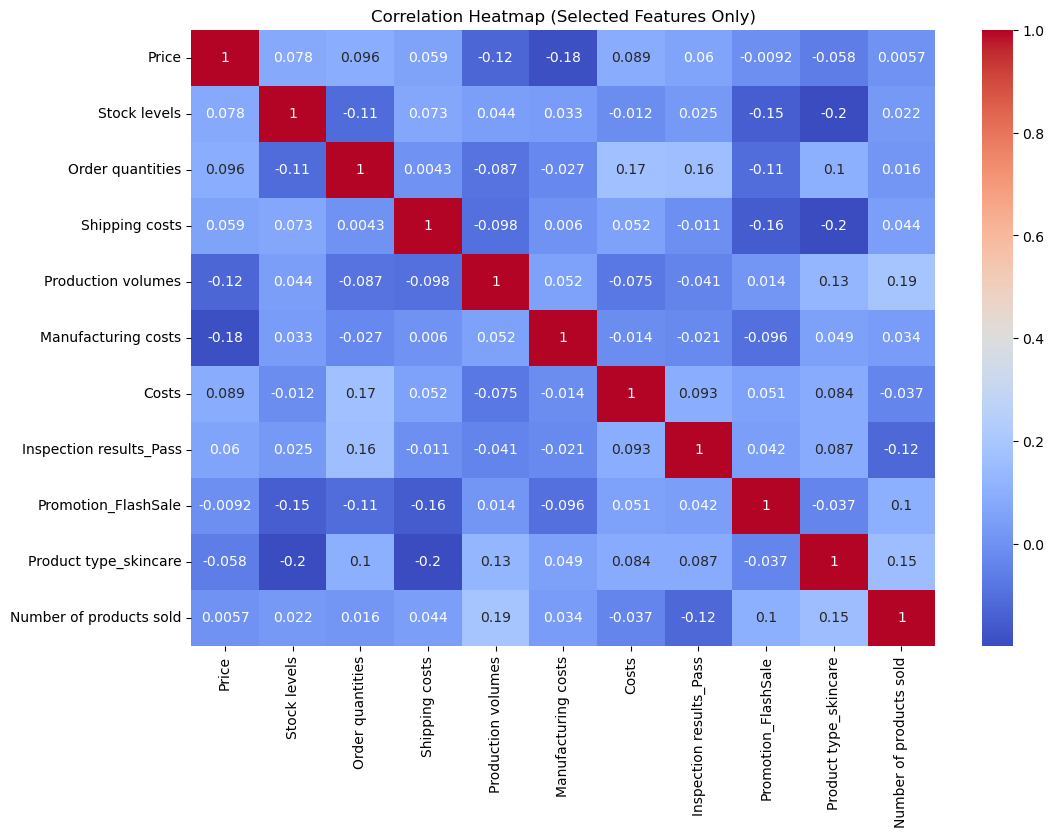

In [12]:
selected_features = [
    'Price',
    'Stock levels',
    'Order quantities',
    'Shipping costs',
    'Production volumes',
    'Manufacturing costs',
    'Costs',
    'Inspection results_Pass',
    'Promotion_FlashSale',
    'Product type_skincare'
]

# Include target for correlation heatmap
df_cleaned = df_encoded[selected_features + ['Number of products sold']].copy()

# Split features and target
X = df_cleaned[selected_features]
y = df_cleaned['Number of products sold']

# Plot correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Selected Features Only)")
plt.show()

Save the df_cleaned DataFrame

In [13]:
df_cleaned.to_csv('cleaned_supply_chain_data.csv', index=False)

Top Features vs Target

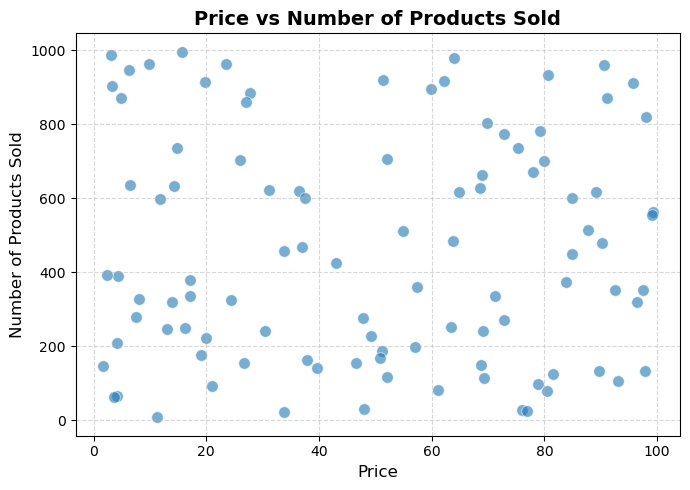

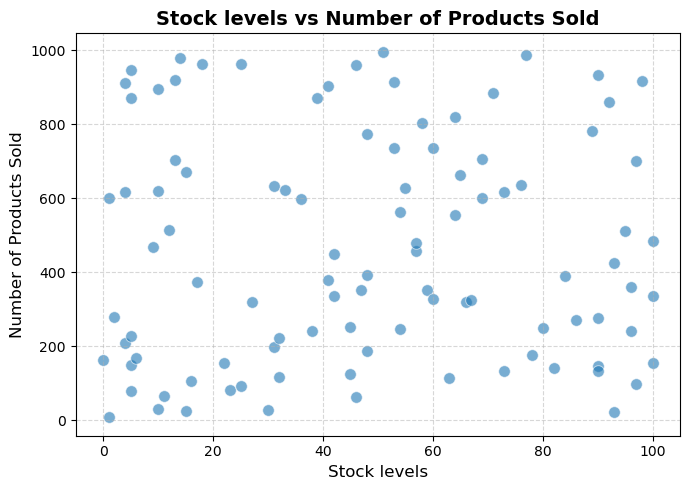

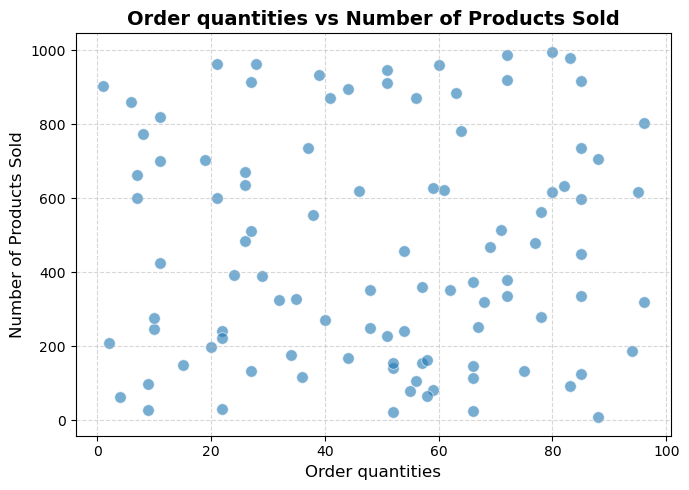

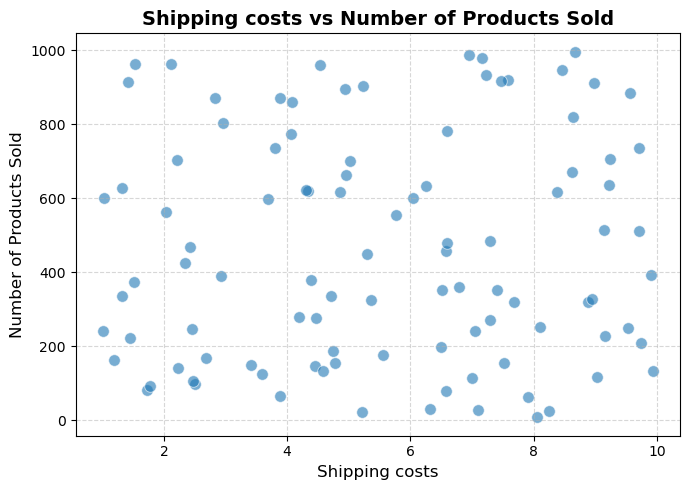

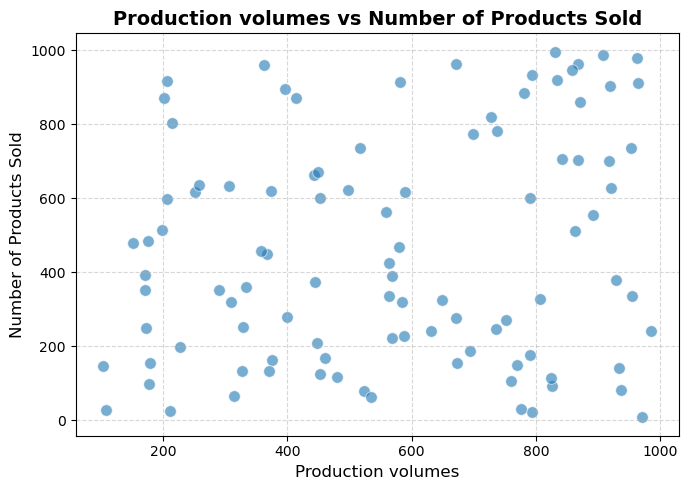

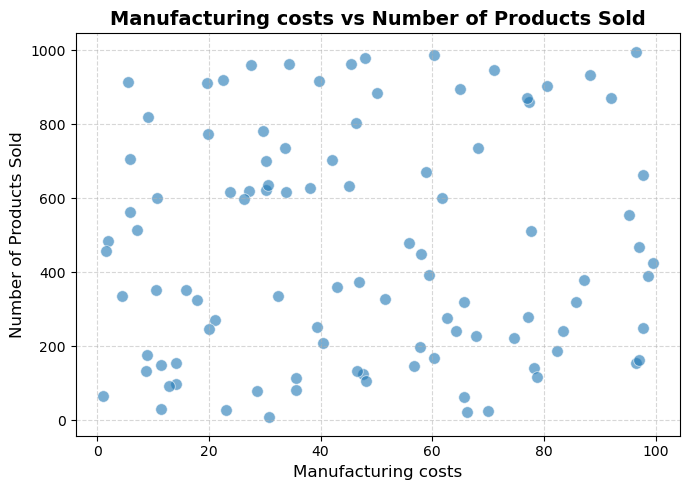

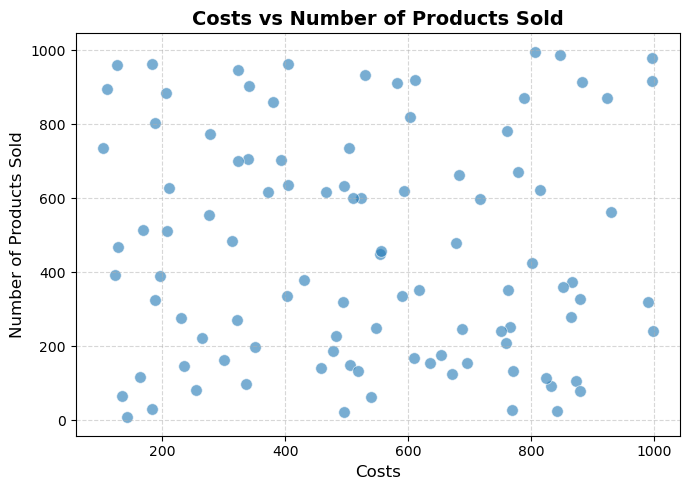

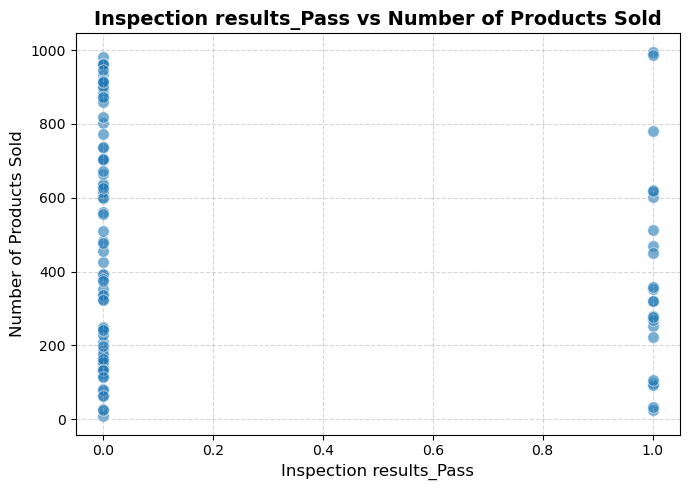

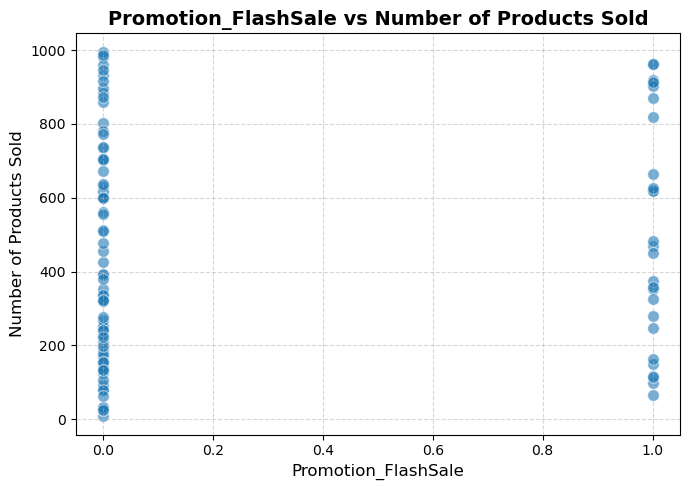

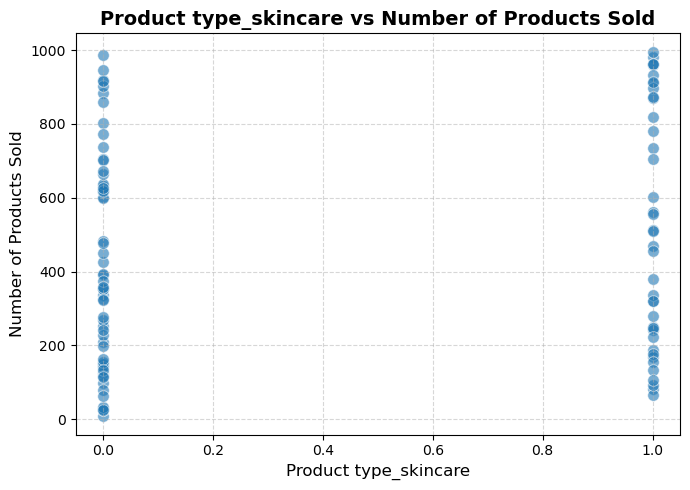

In [14]:
for col in selected_features:
    plt.figure(figsize=(7, 5))
    sns.scatterplot(
        x=df_cleaned[col],
        y=df_cleaned['Number of products sold'],
        alpha=0.6,              # makes overlapping points more transparent
        edgecolor='w',          # adds white edge to points for visibility
        s=70                    # size of the points
    )
    
    # Optional: Add a trend line
    # sns.regplot(x=df_cleaned[col], y=df_cleaned['Number of products sold'], scatter=False, color='red', ci=None)

    plt.title(f'{col} vs Number of Products Sold', fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Number of Products Sold', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

Categorical Impact on Target

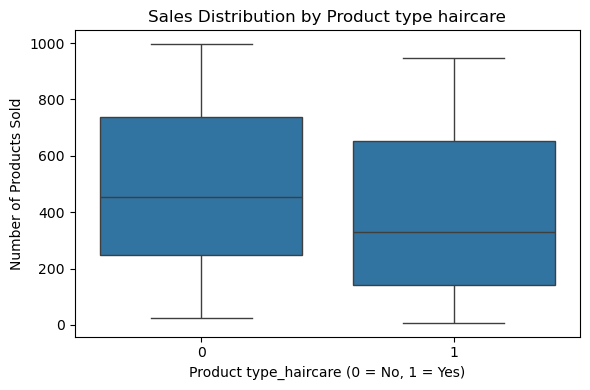

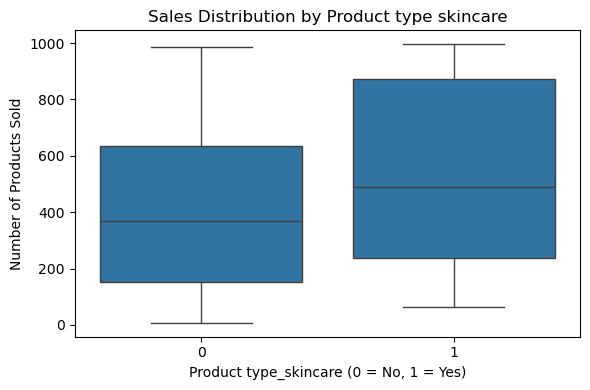

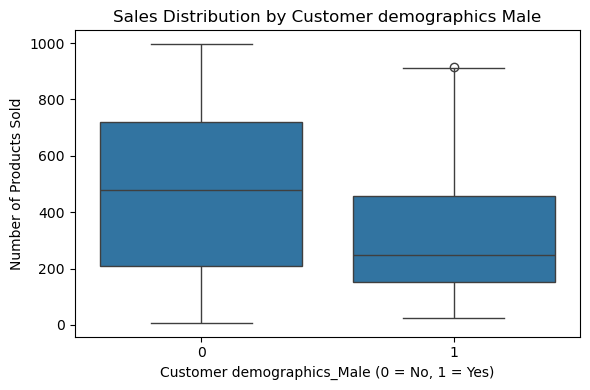

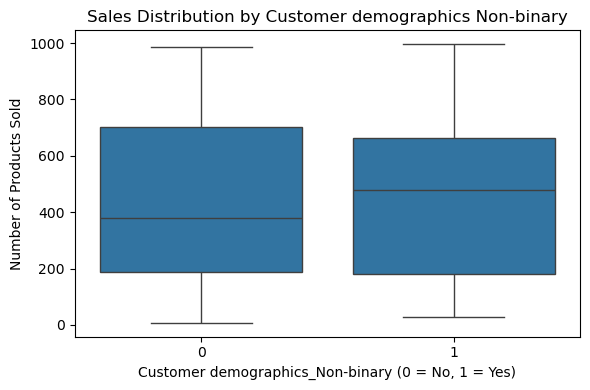

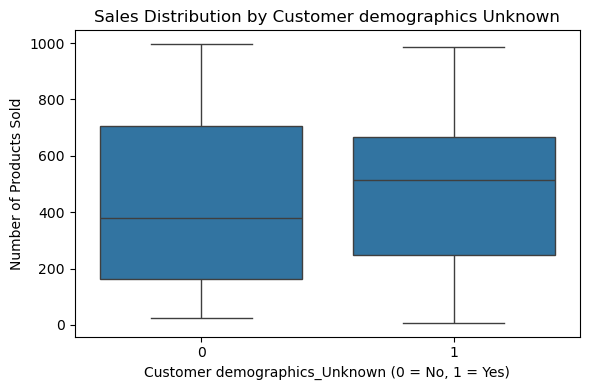

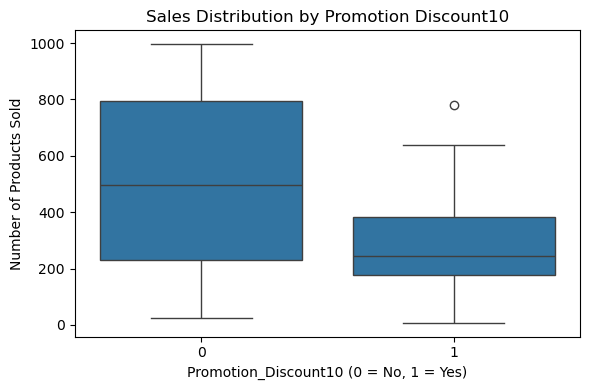

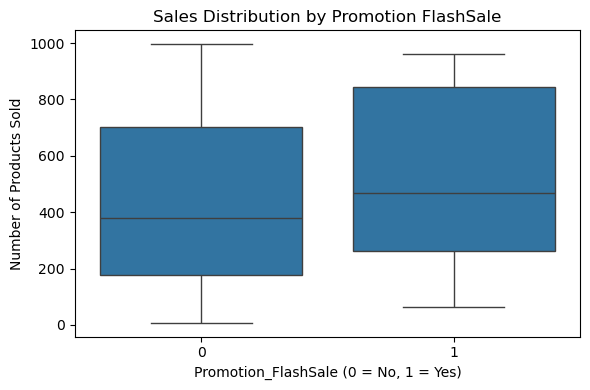

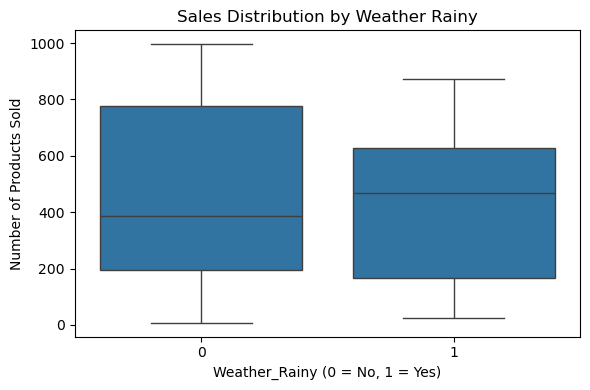

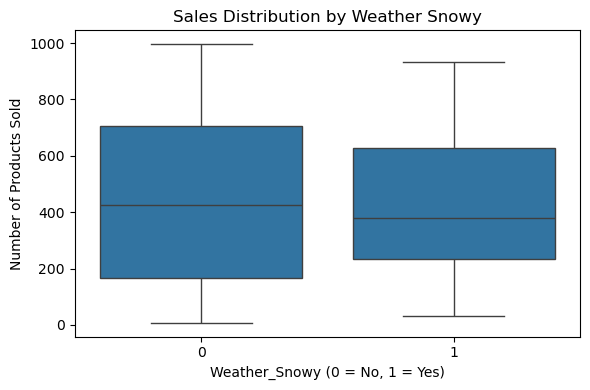

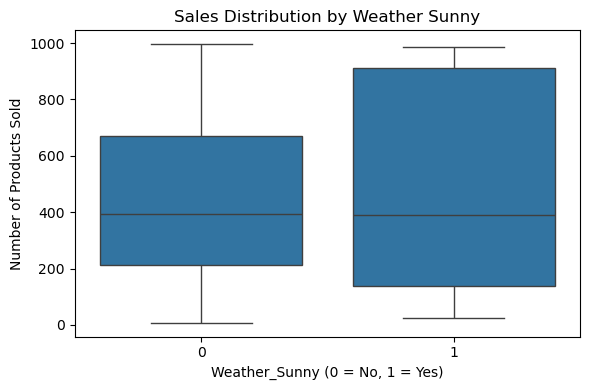

In [15]:
one_hot_columns = [
    'Product type_haircare', 'Product type_skincare',
    'Customer demographics_Male', 'Customer demographics_Non-binary',
    'Customer demographics_Unknown',
    'Promotion_Discount10', 'Promotion_FlashSale',
    'Weather_Rainy', 'Weather_Snowy', 'Weather_Sunny'
]
for col in one_hot_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_encoded[col], y=df_encoded['Number of products sold'])
    plt.xlabel(f"{col} (0 = No, 1 = Yes)")
    plt.ylabel("Number of Products Sold")
    plt.title(f"Sales Distribution by {col.replace('_', ' ')}")
    plt.tight_layout()
    plt.show()